In [1]:
#import the pandas, numpy libraries as pd, and np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

In [2]:
#ACQUIRE
# Put this data into a variable  
wrangled_WHO_data = pd.read_csv(r'C:\Users\moder\Documents\Springboard\PROJECTS ASSIGNMENTS files and instructions\Capstones\Capstone 2\wrangled_WHO_data.csv')

# Using the head() pandas method, observe the first three entries.
wrangled_WHO_data.head(3)

Country  Year      Status  Life_Expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   infant deaths  Alcohol  Percentage_Expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   

   Polio  Total_Expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   thinness  1-19 years  thinness 5-9 years  Income_Composition_Resources  \
0                  17.2                17.3                         0.479   
1                  17.5                17.5                         0.476   
2                  17.7                17.7                         0.470   

   Schooling  
0       10.1  
1       10.0  
2        9.9  

[3 rows x 22 columns]

In [3]:
#column Status needs to be explored - what are the categories?
wrangled_WHO_data["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

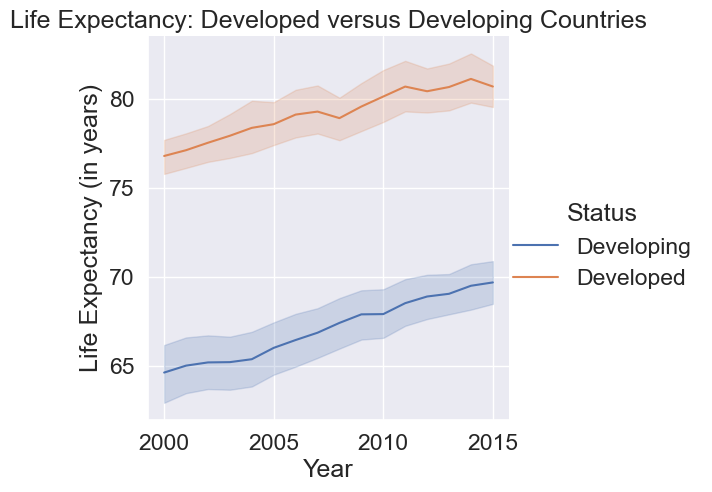

In [10]:
#developing versus undeveloped
#this seems to be the first big delineation that could affect life expectancy - do developing countries have higher life expectancy?
#visualize
sns.set(font_scale=1.5)
sns.relplot(x="Year", y="Life_Expectancy", kind="line", hue="Status", data=wrangled_WHO_data)
plt.title("Life Expectancy: Developed versus Developing Countries", fontsize=18)
sns.set_style("white")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (in years)")
plt.show()

CLEARLY developed countries have much higher life expectancy than developing countries. It also looks like life expectancy went up for each category over the 15 years, which could have to be more deeply considered as to why.

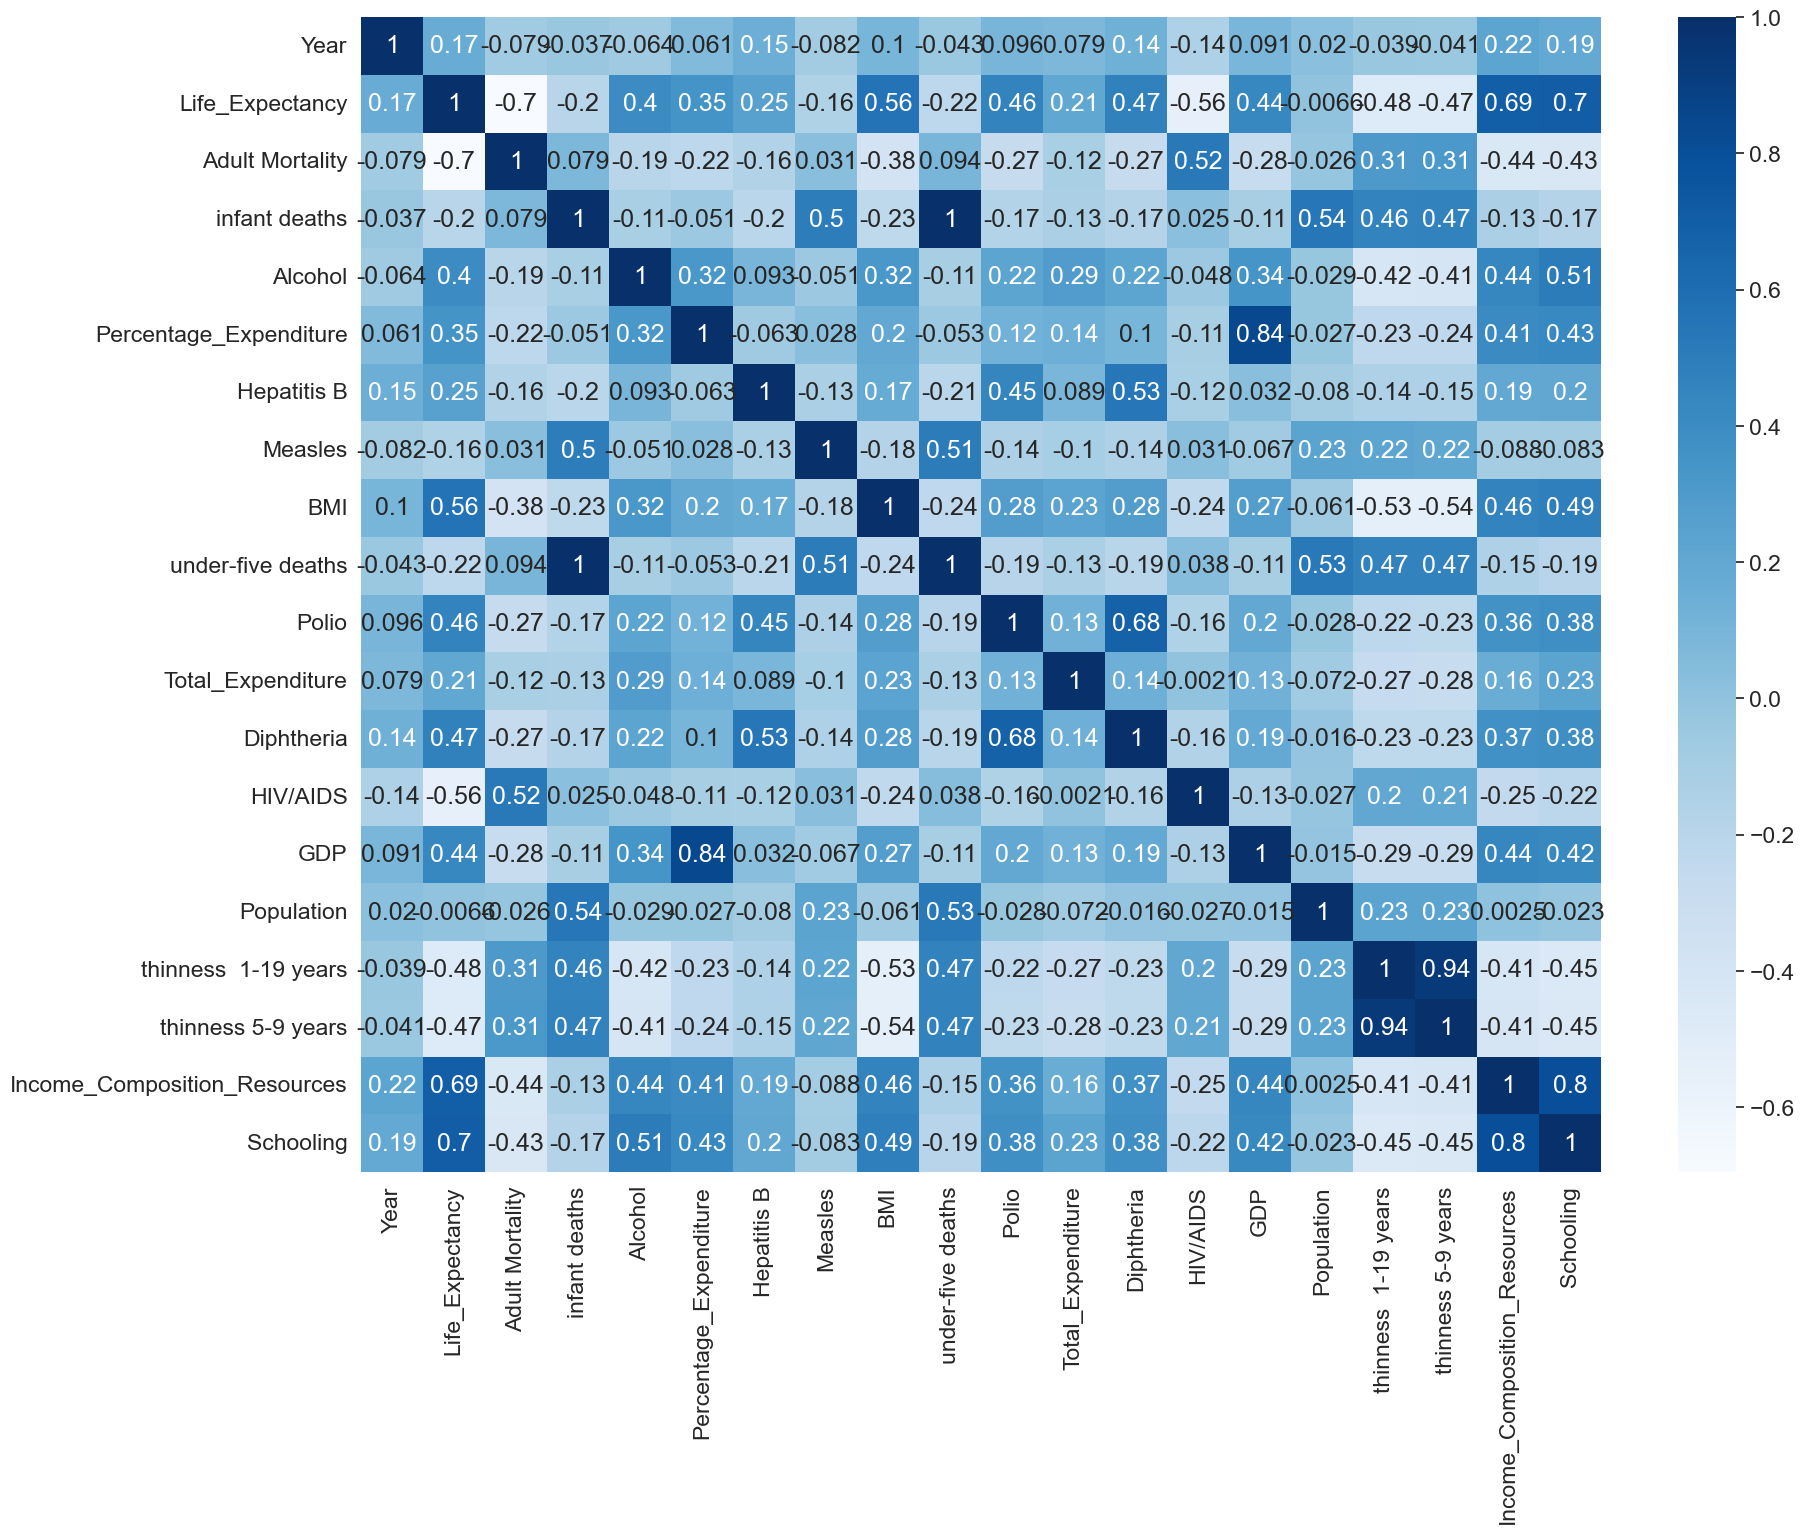

In [11]:
#try out some other visualizations! a heat map to tease out correlations
plt.figure(figsize=(20,15))
sns.heatmap(wrangled_WHO_data.corr(),annot=True,cmap='Blues')
plt.show()

It's already looking like there are some strong correlations between some factors and life expectancy. Our previous plot clearly showed that STAUS ("developing") is a factor is high life expectancy. I'm also seeing: income composition of resources (.69), schooling (.7 - the highest?), Alcohol (.4), BMI (.56), GDP (.44) as being potentially related. Rates of vaccinations: Polio (.46), Diptheria (.47). As we already determined, status (developed versus developing) is very much correlated to life expectancy.

I'm fascinated to see what DOESN'T seem to correlate at all with life expectancy - HIV/AIDS, thinness, and adult mortality.

In [12]:
#schooling
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Schooling',color='Country',size='Year',template='plotly',title='Life Expectancy in Comparison to Schooling')

I'm seeing very high life expectancy in countries where citizens spend a high number of years in school (15.5-17.5 years). New Zealand seems the outlier - high life expectancy and over 20 years of schooling. These countries to take a closer look at where there is a correlation between number of years schooling and life expectancy are: New Zealand, Norway, Finland, Portugal, Spain, Belgium, Italy, France, Sweden.

But I'm also looking at the Democratic Republic of the Congo - high number of years for schooling, but much lower life expectancy (between 50-50 years) - other factors must be at play to lower their life expectancy. It's possible in order to be entirely accurate that we need to double check that data.

In [13]:
# income composition of resources?
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Income_Composition_Resources',color='Country',size='Year',template='plotly',title='Life Expectancy in Comparison to Income Composition of Resources')

A fascinating plot! Human Development Index in terms of income composition of resources (index ranging from 0 to 1). Income composition of resources means a country utilizes its resources productively. I'm seeing basically the same countries with a high income composition of resources and high life expectancy: Norway, Germany, New Zealand, Sweden, Belgium, France, Spain, Italy, and Portugal. This list is overlapping greatly with high life expectancy <-> number of years of schooling.

In [14]:
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='BMI',color='Country',size='Year',template='plotly',title='Life Expectancy in Comparison to BMI')

BMI is average body mass of a population, the higher the number the more body mass. So of course, this one is quite misleading, because you would think the higher the BMI as a number the better, but actually the higher the number, the more someone weighs, which is usually an indicator of poor health, and therefore low life expectancy. But we are seeing that countries with high BMI (people who are overweight) have high life expectancy, so actually, low BMI isn't making people live longer. Countries with high BMI but living the longest: New Zealand, Belgium, Germany, Finland, Norway, Sweden, Spain, France, Italy.

Looking back at the heat map this isn't actually surprising considering that thinness seems to have no relation with life expectancy.

There is one weird outlier and that is Portugal with a high life expectancy but very low BMI of 10 - that is quite underweight and not healthy. May need investigation if Portugal remains an interest. 

In [15]:
#check relationship with GDP
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='GDP',color='Country',size='Year',template='plotly',title='Life Expectancy in Relationship to GDP')

Not really seeing the relationship I thought I'd see - the same countries ahead of the pack with high life expectancy actually have low GDP in comparison with many countries. So high GDP doesn't seem to be a determing factor by itself. Countries with relatively low GDP but high life expectancy: Germany, Spain, Portugal, France.

Interesting outlier: Luxembourg - high GDP, very high life expectancy. But it hasn't been showing up in regards to the other correlating factors.

In [16]:
#checking on alcohol just in case
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Alcohol',color='Country',size='Year',template='plotly',title='Life Expectancy in Relationship to Alcohol')

Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol). These same countries with high life expectancy are consuming a fair amount of alcohol, comparatively, so it would indeed appear alcohol is not as important to life expectancy as schooling or income composition of resources. In fact, the countries who drink the most (Estonia, Belarus) are still living into their '70s at least, so that still confirms alcohol is not killing people at a young age to a degree of concern for this question. You also see many countries where alcohol consumption is minimal and yet they are still experiencing very low life expectancy. I don't think this will be a feature in analysis moving forward.

For further analysis based on this graph: Germany, Spain, France, New Zealand, Italy, Finland, Belgium. Portugal (although with a very low BMI - needs double checking).

Now to check polio and diptheria immunization rates:

In [17]:
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Polio',color='Country',size='Year',template='plotly',title='Life Expectancy in Relationship to Polio Immunization')

Polio (Pol3) immunization coverage among 1-year-olds (%)

In [18]:
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Diphtheria',color='Country',size='Year',template='plotly',title='Life Expectancy in Relationship to Diphtheria Immunization')

Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

Looking at the distribution here, it confirms that high immunization rates are evident among countries with high life expectancy, but also decently high where life expectancy is very low. You also see countries with very low rates of immunization where people are still living into their '70s and '80s. I don't think that this is a feature to focus on moving forward.

In [19]:
#I wanted to look at percentage expenditure
#this is the column where I replaced zeros with interpolated data - should be decent
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Percentage_Expenditure',color='Country',size='Year',template='plotly',title='Life Expectancy in Relationship to Percentage Expenditure')

Not sure if some of the data is off here - Democratic Republic of Congo has a weird behavior - very low life expectancy but high expenditure on health as a percentage of Gross Domestic Product per capita(%). But generally, the higher the percentage expenditure, the higher the life expectancy... same countries to look at, all European countries.

In [20]:
#what is the highest life expectancy?
wrangled_WHO_data["Life_Expectancy"].max()

89.0

In [21]:
#which countries have attained that life expectancy?
highest_life_expectancy = wrangled_WHO_data.loc[wrangled_WHO_data['Life_Expectancy'] == 89.0].sort_values(by=['Country'])
highest_life_expectancy

Country  Year      Status  Life_Expectancy  Adult Mortality  \
241       Belgium  2014   Developed             89.0             76.0   
915       Finland  2014  Developing             89.0             78.0   
937        France  2008  Developing             89.0             88.0   
938        France  2007  Developing             89.0             89.0   
995       Germany  2014   Developed             89.0             69.0   
1293        Italy  2004   Developed             89.0             66.0   
1850  New Zealand  2010   Developed             89.0             71.0   
1916       Norway  2009   Developed             89.0             67.0   
2056     Portugal  2014   Developed             89.0             78.0   
2433        Spain  2007   Developed             89.0             72.0   
2513       Sweden  2007   Developed             89.0             63.0   

      infant deaths  Alcohol  Percentage_Expenditure  Hepatitis B  Measles  \
241               0    12.60             7163.348923    98.000000       70   
915               0     8.80             6164.455402    96.588235        0   
937               3    11.90             7002.785925    47.000000      604   
938               3    12.20               64.737149    42.000000       39   
995               2    11.03              941.756291    88.000000      443   
1293              2     8.98             4270.914882    96.000000      599   
1850              0     9.62             6664.148708     9.000000       43   
1916              0     6.68              142.374943    99.000000        2   
2056              0     9.88              271.254553    98.000000        0   
2433              2    11.05              510.932701    96.000000      267   
2513              0     6.90             7593.391622    41.857143        1   

      ...  Polio  Total_Expenditure  Diphtheria  HIV/AIDS          GDP  \
241   ...   99.0               1.59        99.0       0.1  47439.39684   
915   ...   98.0               9.68        98.0       0.1  49914.61864   
937   ...   98.0               1.57        98.0       0.1  45413.65710   
938   ...   99.0               1.45        98.0       0.1    416.58397   
995   ...   94.0              11.30        95.0       0.1   4792.65288   
1293  ...   97.0               8.49        94.0       0.1  31174.56118   
1850  ...   93.0              11.20        93.0       0.1  33691.34837   
1916  ...   94.0               9.49        94.0       0.1    817.77681   
2056  ...   98.0               9.50        98.0       0.1   2277.53613   
2433  ...   96.0               8.36        96.0       0.1   3279.41400   
2513  ...   98.0               8.92        98.0       0.1  53324.37937   

        Population  thinness  1-19 years  thinness 5-9 years  \
241   1.129570e+05                   1.0                 1.0   
915   5.461512e+06                   0.9                 0.8   
937   6.437499e+06                   0.6                 0.6   
938   6.416229e+06                   0.6                 0.6   
995   8.982500e+04                   1.1                 1.1   
1293  5.768533e+07                   0.5                 0.5   
1850  1.032883e+07                   0.3                 0.3   
1916  4.828726e+06                   0.7                 0.7   
2056  1.416200e+04                   0.7                 0.5   
2433  4.522683e+06                   0.6                 0.5   
2513  9.148920e+05                   1.3                 1.3   

      Income_Composition_Resources  Schooling  
241                          0.890       16.3  
915                          0.890       17.0  
937                          0.877       16.1  
938                          0.873       16.1  
995                          0.920       17.0  
1293                         0.846       15.6  
1850                         0.899       20.3  
1916                         0.936       17.4  
2056                         0.837       16.8  
2433                         0.849       16.0  
2513      

The features to model will be SCHOOLING, and INCOME COMPOSITION OF RESOURCES.

STATUS is also correlating, but there are only 2 categories - clearly developed countries have the highest life expectancy, but as the histogram shows, the number of countries in the list that are developing far outnumber the number of developed. The category developed versus developing is dependent upon the other features already in this dataset, so will just be used for context.

What needs to be remembered, though, is that before adding missing values and zeros, 

1. Income composition of resources has 167 (5.7%) missing values
2. Schooling has 163 (5.5%) missing values	
3. Income composition of resources has 130 (4.4%) zeros

That's not a deal breaker but if real, correct data could be added that would make the model even more sound.